# **HIGGS BOSON DATASET(continued)**

#Pre-requisites:

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/higgs-boson/training.zip
/kaggle/input/higgs-boson/HiggsBosonCompetition_AMSMetric_rev1.py
/kaggle/input/higgs-boson/random_submission.zip
/kaggle/input/higgs-boson/test.zip


In [2]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   209  100   209    0     0    794      0 --:--:-- --:--:-- --:--:--   794
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11731 sha256=11d4b10fd983d387d47bf2d149dfd20f044bac619c9f93b031bc29709e156d7f
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built liac-arff
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=b8186cdde8165a048b62bc3a0a64016aa4fda3f7bfe20f1d76e1cd76e2f686fd
  Stored in directory: /root/.cache/pip/wheels/42/71/95/7555ec3253e1ba8add72ae5febf1b015d297f3b73ba296d6f6
Successfully built pynisher
     |████████████████████████████████| 4.0 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 258 kB 1.2 MB/s eta 0:00:01
  Created wheel for smac: filename=smac-0.13.1-

In [3]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

     |████████████████████████████████| 60 kB 761 kB/s eta 0:00:01
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66638 sha256=5b76542f830548fe16c1135d4b0359037f6d905d7924a964053223ef0d9b0591
  Stored in directory: /root/.cache/pip/wheels/9f/a6/a1/898c991294471015f13c1e5b456fb8134c1af835db4dd93a7a
Successfully built dtreeviz
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.8.0.post0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.
autogluon-core 0.1.0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.


In [4]:
!pip install -U rfpimp
!pip install -U imbalanced-learn
%matplotlib inline
#importing libraries
import numpy as np
import scipy.stats
import scipy.special
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate
from keras.layers.embeddings import Embedding
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
import pickle
import csv
import collections
from rfpimp import *
from rfpimp import plot_corr_heatmap
from datetime import datetime
from sklearn import preprocessing
from keras.callbacks import ModelCheckpoint
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
import math
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10668 sha256=64f003363e3bd5a622681f23b7dfb0faf1c77b14118d220854ba90cc40c056e6
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


# Dataset:

In [6]:
training=pd.read_csv("/kaggle/input/higgs-boson/training.zip")
test =pd.read_csv("/kaggle/input/higgs-boson/test.zip")
#set event id as index 
training.set_index('EventId', inplace=True)
test.set_index('EventId', inplace=True)

In [7]:
training.PRI_jet_num.value_counts()

0    99913
1    77544
2    50379
3    22164
Name: PRI_jet_num, dtype: int64

In [8]:
#split 
X = training.drop(['Label', 'Weight'], axis =1)
y = training['Label']
y=pd.factorize(y)[0]
X

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
EventId,,,,,,,,,,,,,,,,,,,,,
100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,...,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,...,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,...,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992


In [9]:
y

array([0, 1, 1, ..., 0, 1, 1])

#Stacking
Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The individual classification models are trained based on the complete training set; then, the meta-classifier is fitted based on the outputs -- meta-features -- of the individual classification models in the ensemble. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.

In [10]:
#splitting
Xtrain, Xval, ytrain, yval = train_test_split(X, y, train_size=0.8,stratify=y, random_state=1001)

In [11]:
#plotting the test errors and train scores 
def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6', 
                  test_color='#d7191c', alpha=1.0, ylim=(0, 10)):
    """Deviance plot for ``est``, use ``X_test`` and ``y_test`` for test error. """
    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig, ax = plt.subplots(figsize = (12, 8))
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color=test_color, label='Test %s' % label, 
             linewidth=2, alpha=alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color=train_color, 
             label='Train %s' % label, linewidth=2, alpha=alpha)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_ylim(ylim)
    return test_dev, ax

In [12]:
#first classifier
gb_reg = GradientBoostingClassifier(max_depth = 2, max_features = 0.3, learning_rate=0.1, n_estimators=100, loss='exponential', verbose=1)
gb_reg.fit(Xtrain, ytrain)

      Iter       Train Loss   Remaining Time 
         1           0.9329           43.62s
         2           0.9232           40.12s
         3           0.9001           40.30s
         4           0.8800           40.36s
         5           0.8703           38.38s
         6           0.8582           38.22s
         7           0.8453           38.41s
         8           0.8369           38.81s
         9           0.8287           39.18s
        10           0.8163           38.83s
        20           0.7525           34.57s
        30           0.7229           29.96s
        40           0.7040           25.55s
        50           0.6900           21.30s
        60           0.6815           17.03s
        70           0.6736           12.81s
        80           0.6682            8.49s
        90           0.6632            4.23s
       100           0.6597            0.00s


GradientBoostingClassifier(loss='exponential', max_depth=2, max_features=0.3,
                           verbose=1)

In [13]:
gb_val_performance = classification_report(yval, gb_reg.predict(Xval))
gb_train_performance = classification_report(ytrain, gb_reg.predict(Xtrain))

In [14]:
print(gb_val_performance)

              precision    recall  f1-score   support

           0       0.77      0.69      0.73     17133
           1       0.85      0.90      0.87     32867

    accuracy                           0.82     50000
   macro avg       0.81      0.79      0.80     50000
weighted avg       0.82      0.82      0.82     50000



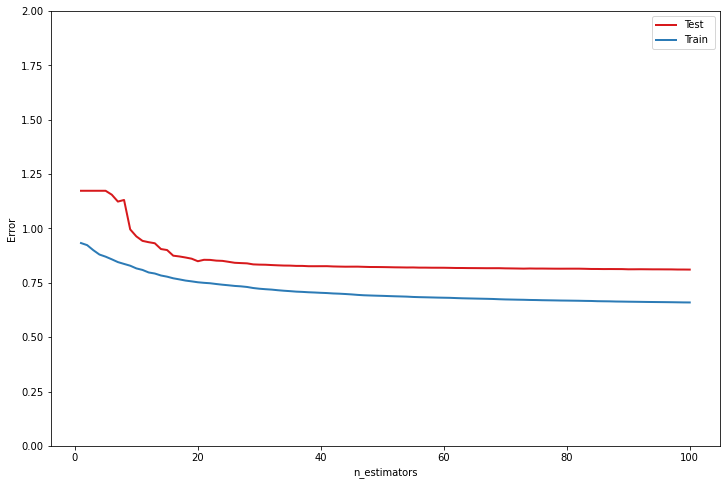

In [15]:
deviance_plot(gb_reg, Xval, yval, ylim=(0,2.0));
plt.legend();

In [16]:
name = list(Xtrain.columns)

<AxesSubplot:>

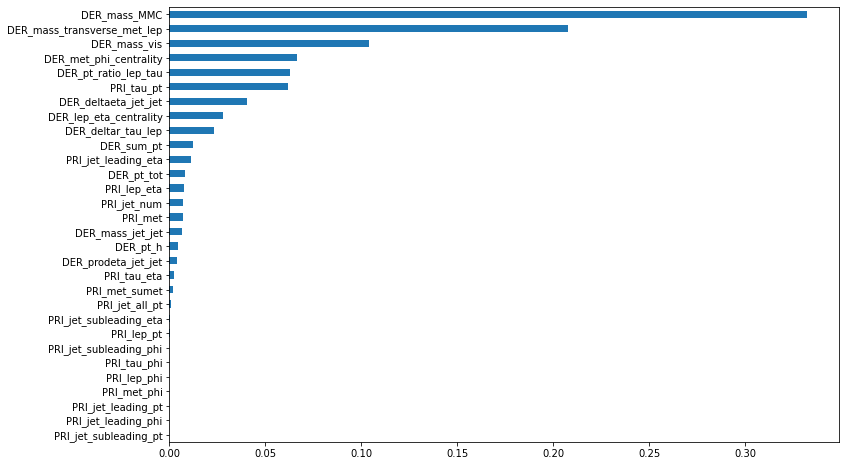

In [17]:
plt.figure(figsize=(12, 8))
pd.Series(gb_reg.feature_importances_, index=name).sort_values().plot(kind="barh")

In [18]:
#XGBoost classifier
dtrain = xgb.DMatrix(Xtrain, label=ytrain)
dvalid = xgb.DMatrix(Xval, label=yval)

xgb_pars = {'min_child_weight': 100, 'eta': 0.04, 'colsample_bytree': 0.8, 'max_depth': 100,
             'subsample': 0.75, 'lambda': 2, 'nthread': -1, 'booster' : 'gbtree', 'verbosity': 2, 'gamma' : 0,
             'eval_metric': 'mae', 'objective': 'reg:linear'}    

xgb = xgb.train(xgb_pars, dtrain, 20,
                  maximize=False, verbose_eval=15) 

[16:49:56] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:58] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1644 extra nodes, 0 pruned nodes, max_depth=23
[16:49:59] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1560 extra nodes, 0 pruned nodes, max_depth=21
[16:50:00] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1596 extra nodes, 0 pruned nodes, max_depth=22
[16:50:02] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1588 extra nodes, 0 pruned nodes, max_depth=22
[16:50:02] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1618 extra nodes, 0 pruned nodes, max_depth=20
[16:50:04] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1644 extra nodes, 0 pruned nodes, max_depth=24
[16:50:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1620 extra nodes, 0 pruned nodes, max_depth=21
[16:50:06] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 

In [19]:
y_pred=xgb.predict(dvalid)

In [20]:
y_pred_=[1 if y>0.5 else 0 for y in y_pred]

In [21]:
print(classification_report(yval,y_pred_))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     17133
           1       0.86      0.90      0.88     32867

    accuracy                           0.84     50000
   macro avg       0.83      0.81      0.82     50000
weighted avg       0.84      0.84      0.84     50000



In [22]:
#Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1), 
                            algorithm = 'SAMME.R',n_estimators=150, learning_rate=0.5)

# Fit on the entire data
boost.fit(Xtrain,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=150)

In [23]:
boost_val_performance = classification_report(yval, boost.predict(Xval))
boost_train_performance = classification_report(ytrain, boost.predict(Xtrain))
print(boost_val_performance)
print(boost_train_performance)

              precision    recall  f1-score   support

           0       0.76      0.70      0.73     17133
           1       0.85      0.89      0.87     32867

    accuracy                           0.82     50000
   macro avg       0.81      0.79      0.80     50000
weighted avg       0.82      0.82      0.82     50000

              precision    recall  f1-score   support

           0       0.75      0.70      0.72     68534
           1       0.85      0.88      0.86    131466

    accuracy                           0.82    200000
   macro avg       0.80      0.79      0.79    200000
weighted avg       0.82      0.82      0.82    200000



<AxesSubplot:>

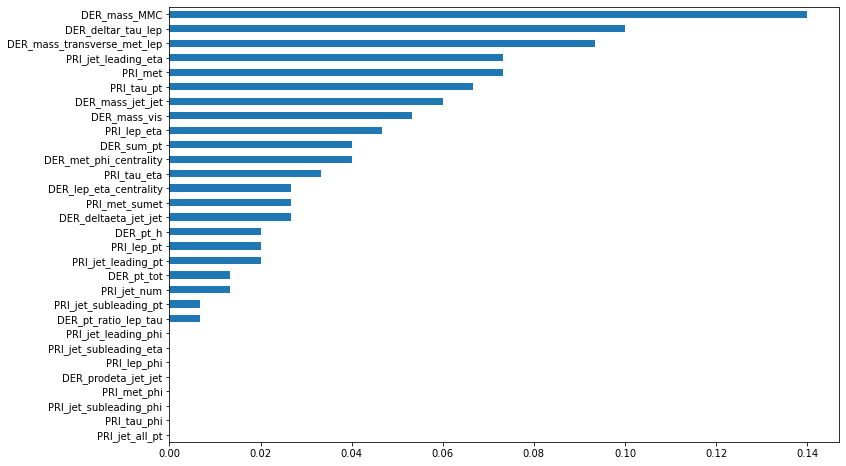

In [24]:
plt.figure(figsize=(12, 8))
pd.Series(boost.feature_importances_, index=name).sort_values().plot(kind="barh")

In [34]:
#Random forest classifier
rf = RandomForestClassifier(n_estimators=500, max_features=3, max_depth=4, random_state=1001, n_jobs=-1)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500, n_jobs=-1,
                       random_state=1001)

<AxesSubplot:>

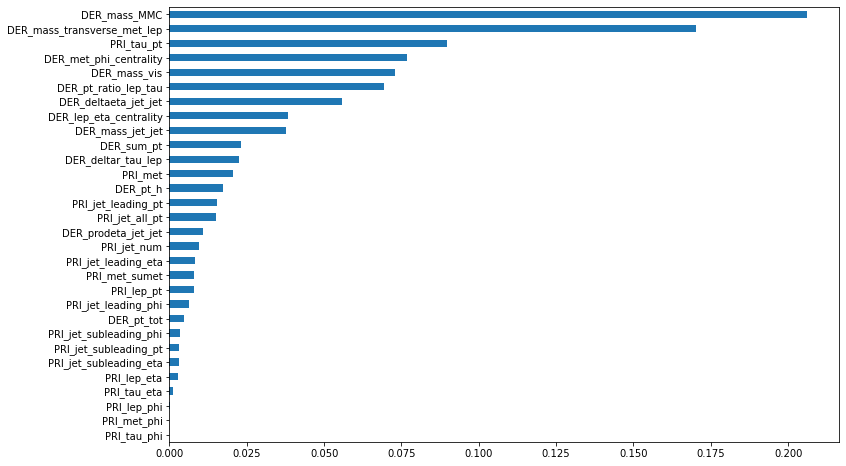

In [36]:
plt.figure(figsize=(12, 8))
pd.Series(rf.feature_importances_, index=name).sort_values().plot(kind="barh")

In [37]:
rf_val_performance = classification_report(yval, rf.predict(Xval))
rf_train_performance = classification_report(ytrain, rf.predict(Xtrain))
print(rf_val_performance)
print(rf_train_performance)

              precision    recall  f1-score   support

           0       0.82      0.50      0.62     17133
           1       0.78      0.94      0.86     32867

    accuracy                           0.79     50000
   macro avg       0.80      0.72      0.74     50000
weighted avg       0.80      0.79      0.78     50000

              precision    recall  f1-score   support

           0       0.82      0.50      0.62     68534
           1       0.78      0.94      0.86    131466

    accuracy                           0.79    200000
   macro avg       0.80      0.72      0.74    200000
weighted avg       0.80      0.79      0.78    200000



In [38]:
rf_features = pd.Series(rf.feature_importances_, index=name).sort_values(ascending=False)
boost_features = pd.Series(boost.feature_importances_, index=name).sort_values(ascending=False)
gb_reg_features = pd.Series(gb_reg.feature_importances_, index=name).sort_values(ascending=False)

In [39]:
f1 = list(rf_features.index[:10])
f2 = list(boost_features.index[:10])
f3 = list(gb_reg_features.index[:10])

In [40]:
#extracting important features based on all three underlying classifiers
important_features = list(set(f1+f2+f3))
important_features

['DER_mass_transverse_met_lep',
 'PRI_jet_leading_eta',
 'DER_deltar_tau_lep',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_mass_MMC',
 'PRI_met',
 'PRI_lep_eta',
 'PRI_tau_pt',
 'DER_mass_vis',
 'DER_sum_pt',
 'DER_lep_eta_centrality',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality']

In [41]:
X = X[important_features]
X

,DER_mass_transverse_met_lep,PRI_jet_leading_eta,DER_deltar_tau_lep,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_mass_MMC,PRI_met,PRI_lep_eta,PRI_tau_pt,DER_mass_vis,DER_sum_pt,DER_lep_eta_centrality,DER_pt_ratio_lep_tau,DER_met_phi_centrality
EventId,,,,,,,,,,,,,,
100000,51.655,2.150,3.064,0.91,124.711,138.470,16.824,2.273,32.638,97.827,197.760,0.2,1.582,1.396
100001,68.768,0.725,3.473,-999.00,-999.000,160.937,44.704,0.501,42.014,103.235,125.157,-999.0,0.879,1.414
100002,162.172,2.053,3.148,-999.00,-999.000,-999.000,54.283,-0.953,32.154,125.953,197.814,-999.0,3.776,1.414
100003,81.417,-999.000,3.310,-999.00,-999.000,143.905,31.082,-0.522,22.647,80.943,75.968,-999.0,2.354,-1.285
100004,16.915,-999.000,3.891,-999.00,-999.000,175.864,2.723,0.798,28.209,134.805,57.983,-999.0,1.056,-1.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349995,71.989,-999.000,1.392,-999.00,-999.000,-999.000,46.520,-0.950,24.754,36.548,55.892,-999.0,1.258,-1.414
349996,58.179,-999.000,2.585,-999.00,-999.000,-999.000,46.737,0.308,23.416,68.083,50.618,-999.0,1.162,-1.345
349997,60.526,1.800,2.390,-999.00,-999.000,105.457,23.419,0.381,35.636,75.839,120.462,-999.0,1.202,0.529


In [35]:
r_state=1001

In [42]:
# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	models['gb'] = GradientBoostingClassifier(max_depth = 2, max_features = 0.3, learning_rate=0.1, n_estimators=60, loss='exponential', random_state=rf)
# 	models['rf'] = RandomForestClassifier(n_estimators=500, max_features=3, max_depth=4, random_state=rf)
# 	models['ab'] = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1), algorithm = 'SAMME.R',n_estimators=150, learning_rate=0.5, random_state=rf)
# 	return models

In [50]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('gb', GradientBoostingClassifier(max_depth = 2, max_features = 0.3, learning_rate=0.1, n_estimators=60, loss='exponential', random_state=r_state)))
	level0.append(('rf', RandomForestClassifier(n_estimators=50, max_features=3, max_depth=4, random_state=r_state, n_jobs=-1)))
	level0.append(('ab', AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1),algorithm = 'SAMME.R',n_estimators=100, learning_rate=0.5)))
	# define meta learner model
	level1 = LogisticRegression(max_iter=10000, penalty='l2', C=1000)
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [45]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [51]:
def get_models():
	models = dict()
	models['gb'] = GradientBoostingClassifier(max_depth = 2, max_features = 0.3, learning_rate=0.1, n_estimators=60, loss='exponential', random_state=r_state)
	models['rf'] = RandomForestClassifier(n_estimators=50, max_features=3,random_state=r_state, max_depth=4, n_jobs=-1)
	models['ab'] = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1), algorithm = 'SAMME.R',n_estimators=100, learning_rate=0.5, random_state=r_state)
	models['stacking'] = get_stacking()
	return models

In [79]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>gb 0.817 (0.001)
>rf 0.810 (0.001)
>ab 0.815 (0.001)
>stacking 0.817 (0.001)


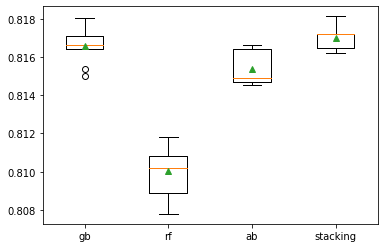

In [80]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()